In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

kc_house_data = pd.read_csv('gdrive/My Drive/uwml/kc_house_data.csv', dtype=dtype_dict)
wk3_kc_house_set_1_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
wk3_kc_house_set_2_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
wk3_kc_house_set_3_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
wk3_kc_house_set_4_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
wk3_kc_house_test_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_test_data.csv', dtype=dtype_dict)
wk3_kc_house_train_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_train_data.csv', dtype=dtype_dict)
wk3_kc_house_valid_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [ ]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


In [ ]:
def polynomial_dataframe(feature, degree): 
  poly_dataframe = pd.DataFrame()
  poly_dataframe['power_1'] = feature
  # first check if degree > 1
  if degree > 1:
    # then loop over the remaining degrees:
    for power in range(2, degree+1):
      # first we'll give the column a name:
      name = 'power_' + str(power)
      poly_dataframe[name] = feature.apply(lambda x: x**power)
  return poly_dataframe

In [ ]:
# Test
polynomial_dataframe(wk3_kc_house_set_1_data['bedrooms'], 3)

,power_1,power_2,power_3
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,3.0,9.0,27.0
4,1.0,1.0,1.0
...,...,...,...
5399,5.0,25.0,125.0
5400,5.0,25.0,125.0
5401,5.0,25.0,125.0
5402,6.0,36.0,216.0


In [ ]:
sales = kc_house_data.sort_values(['sqft_living','price'])

poly15_data = polynomial_dataframe(sales['sqft_living'], 15)

poly15_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59
9254,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59
3914,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60
7252,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61


In [ ]:
l2_small_penalty = 1.5e-5

#model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
#model.intercept_
model.coef_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

In [ ]:
l2_small_penalty=1e-9
l2_large_penalty=1.23e2

model_1 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_2 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_3 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_4 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)

In [ ]:
set_1 = wk3_kc_house_set_1_data.sort_values(['sqft_living','price'])
poly15_set_1 = polynomial_dataframe(set_1['sqft_living'], 15)

set_2 = wk3_kc_house_set_2_data.sort_values(['sqft_living','price'])
poly15_set_2 = polynomial_dataframe(set_2['sqft_living'], 15)

set_3 = wk3_kc_house_set_3_data.sort_values(['sqft_living','price'])
poly15_set_3 = polynomial_dataframe(set_3['sqft_living'], 15)

set_4 = wk3_kc_house_set_4_data.sort_values(['sqft_living','price'])
poly15_set_4 = polynomial_dataframe(set_4['sqft_living'], 15)

In [ ]:
print(poly15_set_1.shape)
print(poly15_set_2.shape)
print(poly15_set_3.shape)
print(poly15_set_4.shape)

(5404, 15)
(5398, 15)
(5409, 15)
(5402, 15)


In [ ]:
model_1_fit = model_1.fit(poly15_set_1.values, set_1['price'])
model_2_fit = model_2.fit(poly15_set_2.values, set_2['price'])
model_3_fit = model_3.fit(poly15_set_3.values, set_3['price'])
model_4_fit = model_4.fit(poly15_set_4.values, set_4['price'])

[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58]


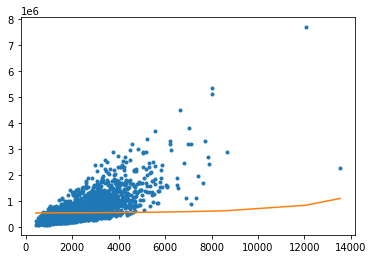

In [ ]:
plt.plot(
  set_1['sqft_living'],set_1['price'],'.',
  poly15_set_1['power_1'], model_1_fit.predict(poly15_set_1),'-'
  )
print(model_1_fit.coef_)

[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55]


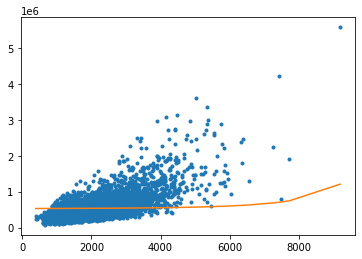

In [ ]:
plt.plot(
  set_2['sqft_living'],set_2['price'],'.',
  poly15_set_2['power_1'], model_2_fit.predict(poly15_set_2),'-'
  )
print(model_2_fit.coef_)

[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56]


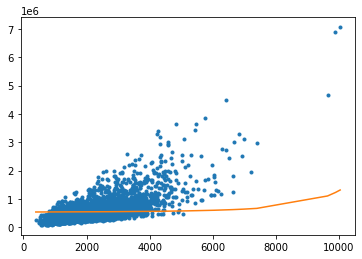

In [ ]:
plt.plot(
  set_3['sqft_living'],set_3['price'],'.',
  poly15_set_3['power_1'], model_3_fit.predict(poly15_set_3),'-'
  )
print(model_3_fit.coef_)

[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-47 6.85958087e-51 8.30843630e-55]


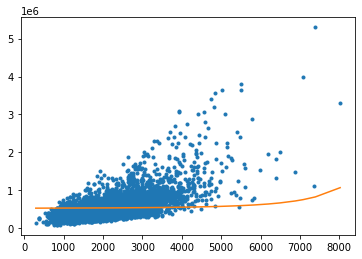

In [ ]:
plt.plot(
  set_4['sqft_living'],set_4['price'],'.',
  poly15_set_4['power_1'], model_4_fit.predict(poly15_set_4),'-'
  )
print(model_4_fit.coef_)

In [ ]:
print('m1 :',round(model_1_fit.coef_[0],2))
print('m2 :',round(model_2_fit.coef_[0],2))
print('m3 :',round(model_3_fit.coef_[0],2))
print('m4 :',round(model_4_fit.coef_[0],2))

m1 : 2.33
m2 : 2.1
m3 : 2.29
m4 : 2.09


In [ ]:
train_valid_shuffled = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)

In [ ]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = round((n*i)/k)
    end = round((n*(i+1))/k-1)
    print(i, ' : ', start, ' : ', end)

0  :  0  :  1939
1  :  1940  :  3878
2  :  3879  :  5818
3  :  5819  :  7757
4  :  7758  :  9697
5  :  9698  :  11637
6  :  11638  :  13576
7  :  13577  :  15516
8  :  15517  :  17455
9  :  17456  :  19395


In [ ]:
n

19396

In [ ]:
def k_fold_cross_validation(k, l2_penalty, data, output):
  
  total_rss = 0
  n = len(data)

  for i in range(k):
    start = round((n*i)/k)
    end = round((n*(i+1))/k-1)
    validation_x = data[start:end+1]
    validation_y = output[start:end+1]
    train_x = data[0:start].append(data[end+1:n])
    train_y = output[0:start].append(output[end+1:n])
    model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
    model_fit = model.fit(train_x, train_y)
    yhat = model.predict(validation_x)
    e = yhat - validation_y
    rss = sum(e**2)
    total_rss = total_rss + rss
    #print(i,':',total_rss)

  average_validation_error = round(total_rss/k/1e12,2)

  return average_validation_error

In [ ]:
poly15_train_valid_shuffled = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
price_train_valid_shuffled = train_valid_shuffled['price']

In [ ]:
l2_large_penalty=1.23e2
k_fold_cross_validation(k=10, l2_penalty=l2_large_penalty, data=poly15_train_valid_shuffled, output=price_train_valid_shuffled)

258.74

In [ ]:
l2_small_penalty = 1.5e-5
k_fold_cross_validation(k=10, l2_penalty=l2_small_penalty, data=poly15_train_valid_shuffled, output=price_train_valid_shuffled)

346.68

In [ ]:
l2_grid = np.logspace(3, 9, num=13)
l2_grid

array([1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07, 3.16227766e+07, 1.00000000e+08, 3.16227766e+08,
       1.00000000e+09])

In [ ]:
for j in l2_grid:
  k_fold_rss = k_fold_cross_validation(k=10, l2_penalty=j, data=poly15_train_valid_shuffled, output=price_train_valid_shuffled)
  print(j, ' : ', k_fold_rss)

1000.0  :  264.98
3162.2776601683795  :  265.69
10000.0  :  265.92
31622.776601683792  :  266.0
100000.0  :  266.02
316227.7660168379  :  266.03
1000000.0  :  266.03
3162277.6601683795  :  266.03
10000000.0  :  266.03
31622776.60168379  :  266.03
100000000.0  :  266.03
316227766.01683795  :  266.03
1000000000.0  :  266.03


In [ ]:
final_model = linear_model.Ridge(alpha=1000, normalize=True)
final_model_fit = model.fit(poly15_train_valid_shuffled, price_train_valid_shuffled)

In [ ]:
test_x = polynomial_dataframe(wk3_kc_house_test_data['sqft_living'], 15)
test_y = wk3_kc_house_test_data['price']

test_yhat = final_model_fit.predict(test_x)
test_e = test_yhat - test_y
rss = sum(test_e**2)
rss

133161422347042.44

In [ ]:
print(round(rss/k/1e12,2))

13.32
